In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp drive/MyDrive/ChatGPT_ADA_playground/TelcoCustomerChurn/WA_Fn-UseC_-Telco-Customer-Churn.csv .

In [ ]:
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [ ]:
import pandas as pd

# Load the dataset
csv_file_path = file_path
df = pd.read_csv(csv_file_path)

# Convert 'TotalCharges' to a numeric format and remove rows with missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df_cleaned = df.dropna(subset=['TotalCharges'])


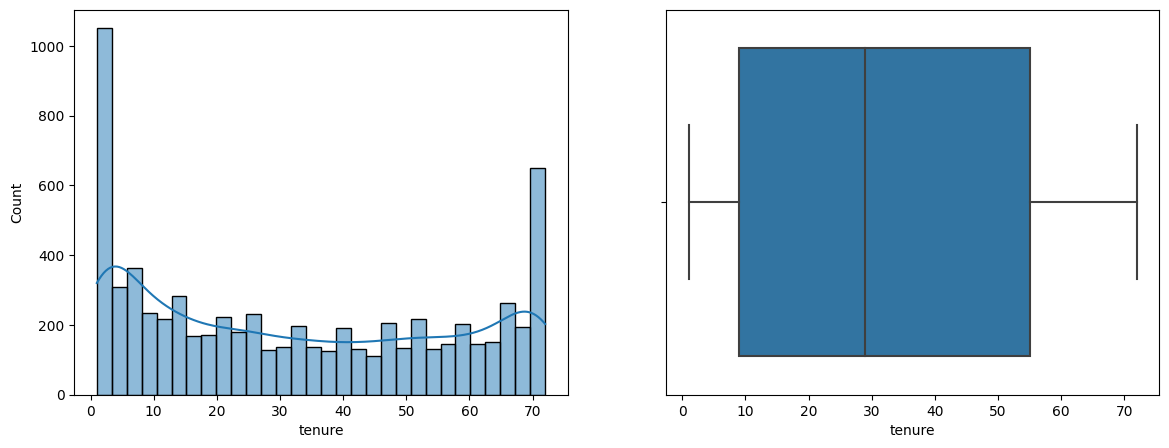

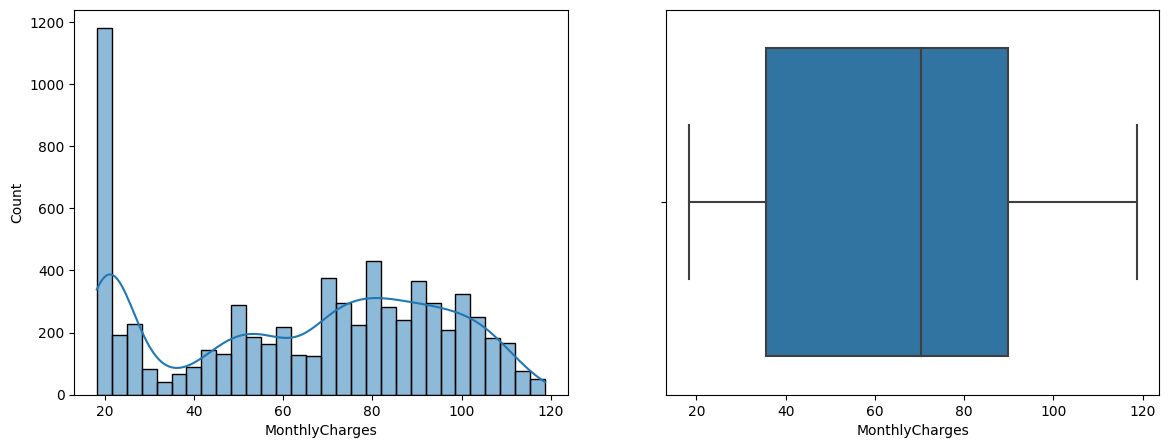

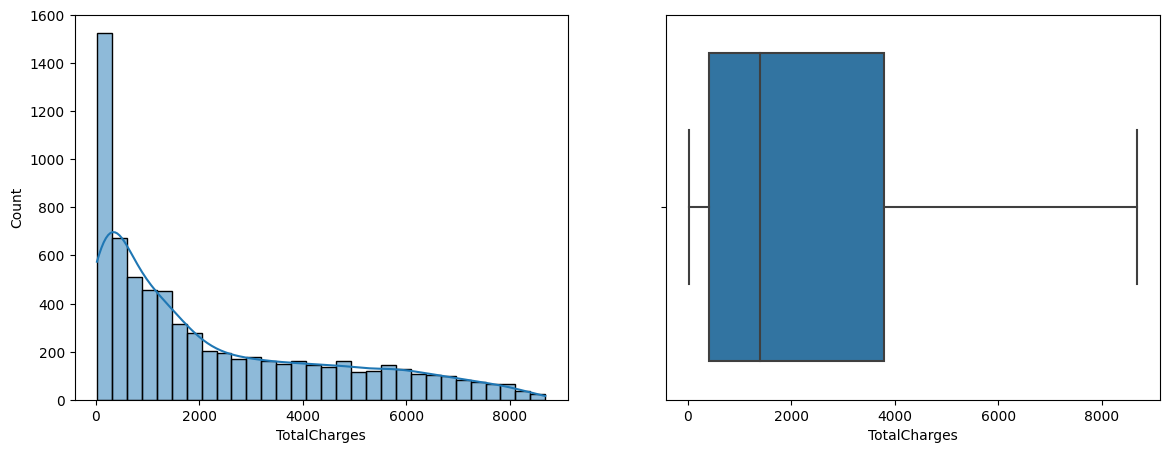

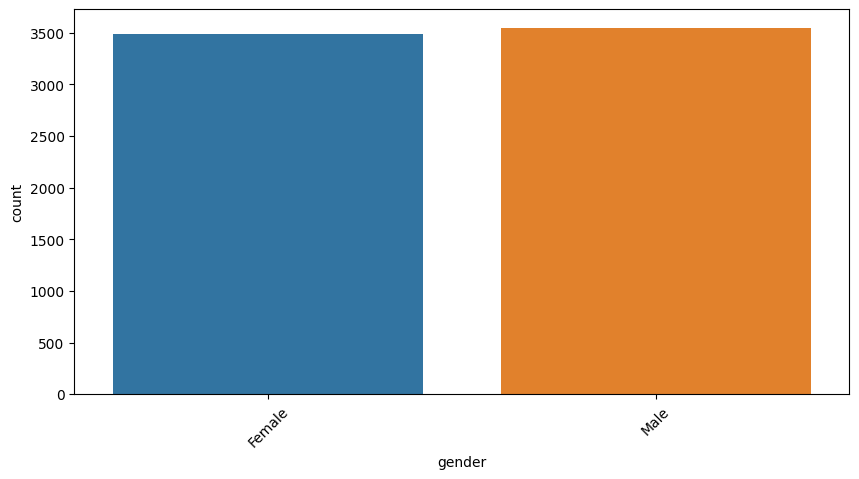

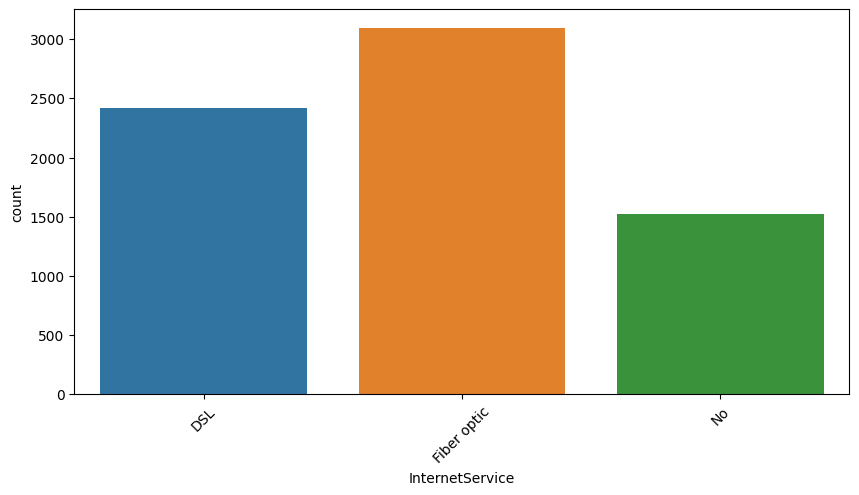

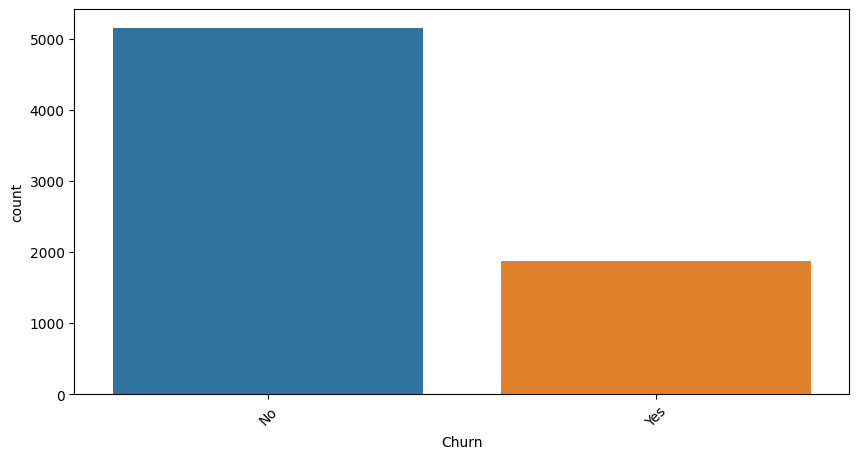

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function for plotting numeric distributions
def plot_numeric_distribution(data, column, bins=30, kde=True):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(data[column], bins=bins, kde=kde, ax=ax[0])
    sns.boxplot(x=data[column], ax=ax[1])
    plt.show()

# Function for plotting categorical distributions
def plot_categorical_distribution(data, column):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=data)
    plt.xticks(rotation=45)
    plt.show()

# Plot distributions for numeric and categorical variables
plot_numeric_distribution(df_cleaned, 'tenure')
plot_numeric_distribution(df_cleaned, 'MonthlyCharges')
plot_numeric_distribution(df_cleaned, 'TotalCharges')
plot_categorical_distribution(df_cleaned, 'gender')
plot_categorical_distribution(df_cleaned, 'InternetService')
plot_categorical_distribution(df_cleaned, 'Churn')


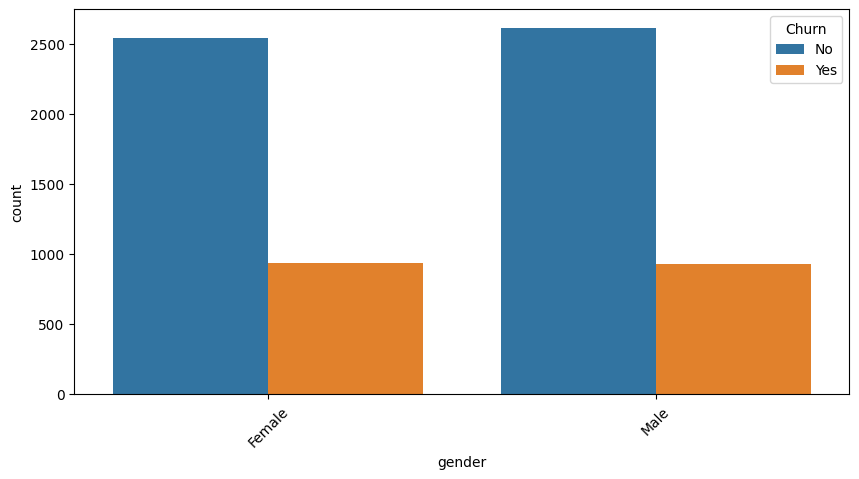

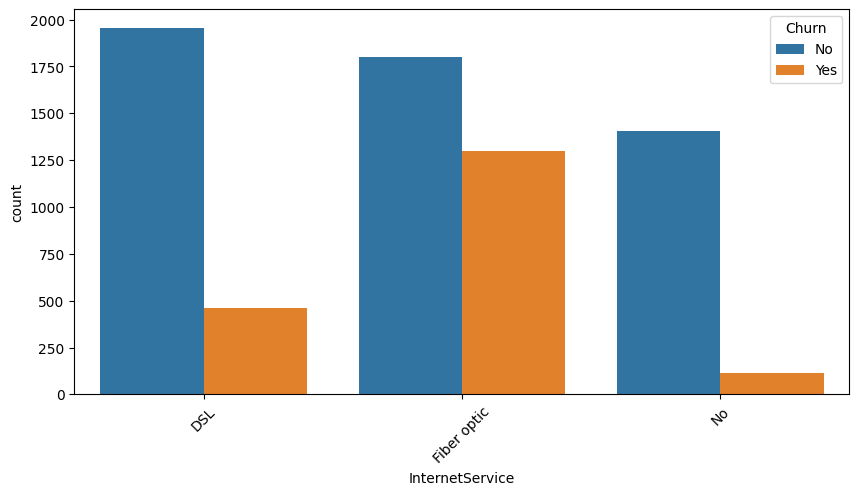

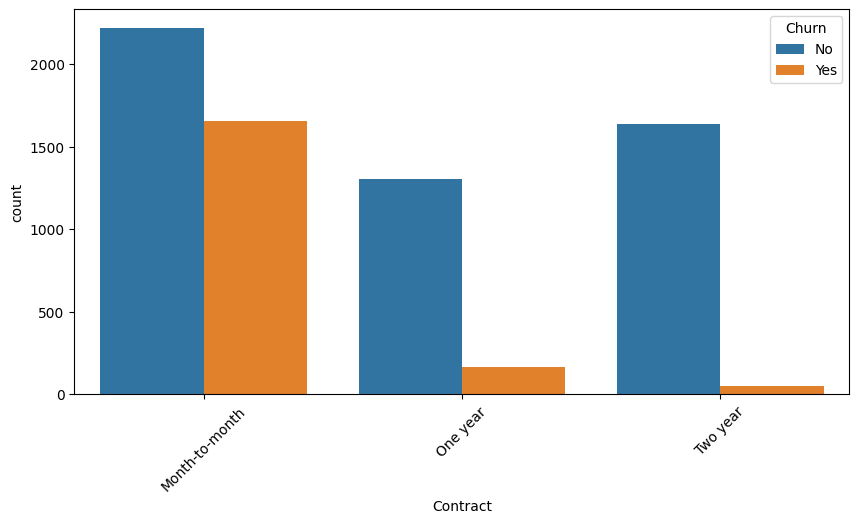

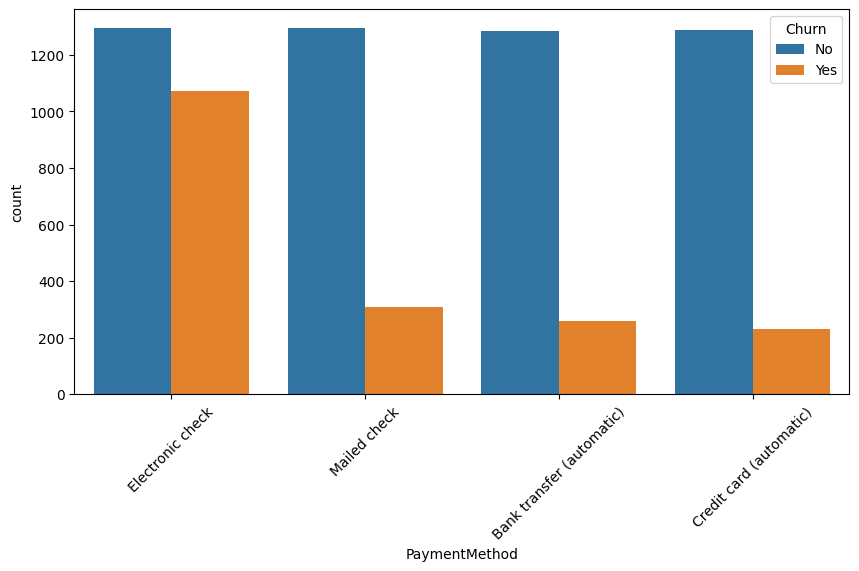

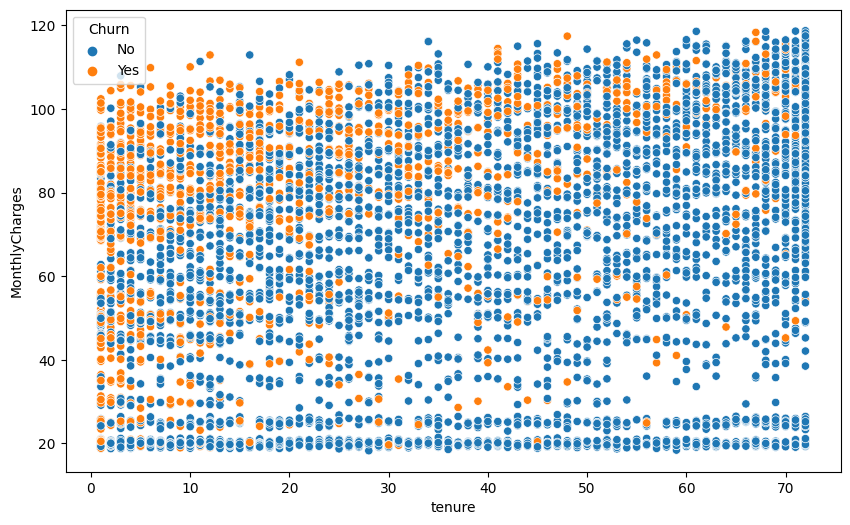

In [ ]:
# Function for bivariate count plots
def plot_bivariate_count(data, x_column, hue_column):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=x_column, hue=hue_column, data=data)
    plt.xticks(rotation=45)
    plt.show()

# Bivariate analysis
plot_bivariate_count(df_cleaned, 'gender', 'Churn')
plot_bivariate_count(df_cleaned, 'InternetService', 'Churn')
plot_bivariate_count(df_cleaned, 'Contract', 'Churn')
plot_bivariate_count(df_cleaned, 'PaymentMethod', 'Churn')

# Scatter plot for numeric variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df_cleaned)
plt.show()


In [ ]:
# Creating tenure segments
bins = [0, 12, 24, 60, max(df_cleaned['tenure'])]
labels = ['0-1 year', '1-2 years', '2-5 years', '5+ years']
df_cleaned['TenureSegment'] = pd.cut(df_cleaned['tenure'], bins=bins, labels=labels, right=False)

# Analyzing churn rate and average monthly charges by tenure segment
tenure_churn_rate = df_cleaned.groupby('TenureSegment')['Churn'].value_counts(normalize=True).unstack().mul(100).round(2)
average_monthly_charges = df_cleaned.groupby('TenureSegment')['MonthlyCharges'].mean().round(2)


<ipython-input-9-b757365f74f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TenureSegment'] = pd.cut(df_cleaned['tenure'], bins=bins, labels=labels, right=False)


In [ ]:
def impute_mean_median(df, column, method='mean'):
    if method == 'mean':
        value = df[column].mean()
    else:  # 'median'
        value = df[column].median()
    return df[column].fillna(value)


In [ ]:
def impute_based_on_columns(df, column, factor_columns):
    product = df[factor_columns[0]] * df[factor_columns[1]]
    return df[column].fillna(product)


In [ ]:
from sklearn.linear_model import LinearRegression

def impute_regression(df, target_column, feature_columns):
    model = LinearRegression()
    not_null_data = df[df[target_column].notnull()]
    null_data = df[df[target_column].isnull()]

    model.fit(not_null_data[feature_columns], not_null_data[target_column])
    predicted_values = model.predict(null_data[feature_columns])

    df_imputed = df.copy()
    df_imputed.loc[df[target_column].isnull(), target_column] = predicted_values
    return df_imputed[target_column]


In [ ]:
from sklearn.impute import KNNImputer

def impute_knn(df, column, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_values = imputer.fit_transform(df[[column]])
    return imputed_values.ravel()  # Flatten the array to 1D


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_multiple(df, column):
    iterative_imputer = IterativeImputer()
    imputed_values = iterative_imputer.fit_transform(df[[column]])
    return imputed_values.ravel()  # Flatten the array to 1D


In [ ]:
def impute_based_on_columns(df, target_column, factor_columns):
    """
    Impute missing values in a target column based on the product of two other columns.

    :param df: DataFrame containing the data
    :param target_column: The name of the column to impute
    :param factor_columns: A list of two column names used for imputation
    :return: A Series with imputed values
    """
    if len(factor_columns) != 2:
        raise ValueError("Exactly two factor columns are required")

    product = df[factor_columns[0]] * df[factor_columns[1]]
    return df[target_column].fillna(product)


In [ ]:
csv_file_path = file_path
df = pd.read_csv(csv_file_path)

# Convert 'TotalCharges' to a numeric format and remove rows with missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [ ]:
columns_to_filter = ['customerID']

In [ ]:
df = df.drop(columns_to_filter,axis=1)

In [ ]:
df['TotalCharges'] = impute_based_on_columns(df, 'TotalCharges', ['MonthlyCharges', 'tenure'])

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#Encoding
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

# Assuming df is your DataFrame
# List of columns for different encodings
one_hot_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
ordinal_cols = ['Contract']
label_cols = ['SeniorCitizen']  # Add other columns as needed

# One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
one_hot_encoded = one_hot_encoder.fit_transform(df[one_hot_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_cols))
df = df.drop(one_hot_cols, axis=1).join(one_hot_df)

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])
df['Contract'] = ordinal_encoder.fit_transform(df[['Contract']])

# Label Encoding
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Now df has all the encoded columns


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Assuming df is your DataFrame
# Replace 'df' with your actual DataFrame name

# Standardization
scaler = StandardScaler()
df['tenure_standardized'] = scaler.fit_transform(df[['tenure']])
df['MonthlyCharges_standardized'] = scaler.fit_transform(df[['MonthlyCharges']])

# Normalization
min_max_scaler = MinMaxScaler()
df['tenure_normalized'] = min_max_scaler.fit_transform(df[['tenure']])
df['MonthlyCharges_normalized'] = min_max_scaler.fit_transform(df[['MonthlyCharges']])

# Log Transformation for TotalCharges
df['TotalCharges_log'] = np.log1p(df['TotalCharges'])  # log1p for handling 0 values
df['TotalCharges_log_standardized'] = scaler.fit_transform(df[['TotalCharges_log']])


In [ ]:
df.head()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_standardized,MonthlyCharges_standardized,tenure_normalized,MonthlyCharges_normalized,TotalCharges_log,TotalCharges_log_standardized
0,0,1,0.0,29.85,29.85,No,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,-1.277445,-1.160323,0.013889,0.115423,3.429137,-2.232521
1,0,34,1.0,56.95,1889.50,No,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.066327,-0.259629,0.472222,0.385075,7.544597,0.390027
2,0,2,0.0,53.85,108.15,Yes,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,-1.236724,-0.362660,0.027778,0.354229,4.692723,-1.427310
3,0,45,1.0,42.30,1840.75,No,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.514251,-0.746535,0.625000,0.239303,7.518471,0.373379
4,0,2,0.0,70.70,151.65,Yes,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,-1.236724,0.197365,0.027778,0.521891,5.028148,-1.213563


In [ ]:
df.to_csv("Telco-Churn_processed.csv",index= False)

In [ ]:
!cp Telco-Churn_processed.csv drive/MyDrive/

In [ ]:
df_processed = pd.read_csv("Telco-Churn_processed.csv")

In [ ]:
df_processed.head()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_standardized,MonthlyCharges_standardized,tenure_normalized,MonthlyCharges_normalized,TotalCharges_log,TotalCharges_log_standardized
0,0,1,0.0,29.85,29.85,No,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,-1.277445,-1.160323,0.013889,0.115423,3.429137,-2.232521
1,0,34,1.0,56.95,1889.50,No,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.066327,-0.259629,0.472222,0.385075,7.544597,0.390027
2,0,2,0.0,53.85,108.15,Yes,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,-1.236724,-0.362660,0.027778,0.354229,4.692723,-1.427310
3,0,45,1.0,42.30,1840.75,No,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.514251,-0.746535,0.625000,0.239303,7.518471,0.373379
4,0,2,0.0,70.70,151.65,Yes,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,-1.236724,0.197365,0.027778,0.521891,5.028148,-1.213563


In [ ]:
data = df_processed
df_processed.columns

Index(['SeniorCitizen', 'tenure', 'Contract', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_standardized', 'MonthlyCharges_standardized',
       'tenure_normalized', 'MonthlyCharges_normalized', 'TotalCharges_log',
       'TotalCharges_log_standardized'],


## Feature Engineering

### Aggregated Features Based on Categorical Variables

In [ ]:
def create_aggregated_features(data, groupby_col, agg_col, agg_func, new_col_name):
    aggregated = data.groupby(groupby_col)[agg_col].agg(agg_func).rename(new_col_name)
    return data.join(aggregated, on=groupby_col)

# Example usage
data = create_aggregated_features(data, 'Contract', 'MonthlyCharges', 'mean', 'AvgMonthlyChargesByContract')


### Interaction Features Between Categorical and Numerical Variables

In [ ]:
def create_interaction_feature(data, cat_feature, num_feature, new_feature_name):
    data[new_feature_name] = data[cat_feature] * data[num_feature]
    return data

# Example usage
data = create_interaction_feature(data, 'SeniorCitizen', 'MonthlyCharges', 'SeniorCitizen_MonthlyCharges')


### Binary Features Based on Thresholds

In [ ]:
def create_binary_threshold_feature(data, feature, threshold, new_feature_name):
    data[new_feature_name] = (data[feature] > threshold).astype(int)
    return data

# Example usage
threshold = data['MonthlyCharges'].quantile(0.75)
data = create_binary_threshold_feature(data, 'MonthlyCharges', threshold, 'HighSpender')


### Customer Segmentation Features

In [ ]:
def create_customer_segment_feature(data, feature, bins, labels, new_feature_name):
    data[new_feature_name] = pd.cut(data[feature], bins=bins, labels=labels)
    return data

# Example usage
data = create_customer_segment_feature(data, 'tenure', bins=[0, 12, 24, 60, data['tenure'].max()], labels=['0-1 Year', '1-2 Years', '2-5 Years', '>5 Years'], new_feature_name='TenureSegment')


### Ratio Features

In [ ]:
def create_ratio_feature(data, numerator, denominator, new_feature_name):
    epsilon = 1e-5  # To avoid division by zero
    data[new_feature_name] = data[numerator] / (data[denominator] + epsilon)
    return data

# Example usage
data = create_ratio_feature(data, 'TotalCharges', 'tenure', 'ChargeToTenureRatio')

In [ ]:
data.shape

(7043, 41)

In [ ]:
df_processed.shape

(7043, 36)

In [ ]:
def create_interaction_terms(df, feature_pairs):
    """
    Adds interaction terms for specified pairs of features.

    Args:
    df (pd.DataFrame): The original dataset.
    feature_pairs (list of tuples): Pairs of features for which to create interaction terms.

    Returns:
    pd.DataFrame: The dataset with interaction terms added.
    """
    for feature1, feature2 in feature_pairs:
        interaction_term_name = f'{feature1}_{feature2}_interaction'
        df[interaction_term_name] = df[feature1] * df[feature2]
    return df

def bin_numerical_variables(df, features_to_bin):
    """
    Bins specified numerical variables into categorical bins.

    Args:
    df (pd.DataFrame): The original dataset.
    features_to_bin (dict): Dictionary with feature as key and (bins, labels) as value.

    Returns:
    pd.DataFrame: The dataset with binned numerical variables.
    """
    for feature, (bins, labels) in features_to_bin.items():
        binned_feature_name = f'{feature}_binned'
        df[binned_feature_name] = pd.cut(df[feature], bins=bins, labels=labels, right=False)
    return df

def create_polynomial_features(df, features, degrees):
    """
    Adds polynomial features for specified features.

    Args:
    df (pd.DataFrame): The original dataset.
    features (list): List of features to create polynomial features for.
    degrees (list): List of degrees for polynomial features.

    Returns:
    pd.DataFrame: The dataset with polynomial features added.
    """
    for feature in features:
        for degree in degrees:
            poly_feature_name = f'{feature}_power_{degree}'
            df[poly_feature_name] = df[feature] ** degree
    return df

def calculate_ratios(df, ratio_pairs):
    """
    Adds ratio features for specified pairs of features.

    Args:
    df (pd.DataFrame): The original dataset.
    ratio_pairs (list of tuples): Pairs of features to calculate ratios.

    Returns:
    pd.DataFrame: The dataset with ratio features added.
    """
    for numerator, denominator in ratio_pairs:
        ratio_feature_name = f'{numerator}_to_{denominator}_ratio'
        df[ratio_feature_name] = df[numerator] / df[denominator]
    return df

def group_and_aggregate(df, groupby_features, agg_features):
    """
    Groups the DataFrame by specified categorical features and aggregates specified numerical features.

    Args:
    df (pd.DataFrame): The original dataset.
    groupby_features (list): List of categorical features to group by.
    agg_features (list): List of numerical features to aggregate.

    Returns:
    pd.DataFrame: The dataset with aggregated features based on groupings.
    """
    for group_feature in groupby_features:
        grouped = df.groupby(group_feature).agg({feat: ['mean', 'std', 'median'] for feat in agg_features})
        grouped.columns = [f'{feat}_{stat}_by_{group_feature}' for feat, stat in grouped.columns]
        df = df.merge(grouped, how='left', on=group_feature)
    return df

# Example usage of the functions with abstracted feature specification
# Assuming 'data' is the original DataFrame
df = data.copy()

# Example parameters (these can be adjusted based on the actual dataset)
interaction_pairs = [('tenure', 'MonthlyCharges')]
features_to_bin = {'tenure': ([0, 12, 36, 60, df['tenure'].max()], ['New', 'Mid-term', 'Long-term', 'Very Long-term'])}
polynomial_features = ['tenure']
polynomial_degrees = [2, 3]
ratio_pairs = [('TotalCharges', 'tenure')]
groupby_features = ['Contract', 'gender_Male']
agg_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Applying the functions
df = create_interaction_terms(df, interaction_pairs)
df = bin_numerical_variables(df, features_to_bin)
df = create_polynomial_features(df, polynomial_features, polynomial_degrees)
df = calculate_ratios(df, ratio_pairs)
df = group_and_aggregate(df, groupby_features, agg_features)

# Display the first few rows of the modified dataset
df.head()


,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,TotalCharges_median_by_Contract,tenure_mean_by_gender_Male,tenure_std_by_gender_Male,tenure_median_by_gender_Male,MonthlyCharges_mean_by_gender_Male,MonthlyCharges_std_by_gender_Male,MonthlyCharges_median_by_gender_Male,TotalCharges_mean_by_gender_Male,TotalCharges_std_by_gender_Male,TotalCharges_median_by_gender_Male
0,0,1,0.0,29.85,29.85,No,0.0,1.0,0.0,0.0,...,679.55,32.244553,24.463233,29.0,65.204243,30.061341,70.65,2279.918062,2270.845667,1384.725
1,0,34,1.0,56.95,1889.50,No,1.0,0.0,0.0,1.0,...,2656.70,32.495359,24.656359,29.0,64.327482,30.116093,70.10,2279.554008,2263.132028,1401.150
2,0,2,0.0,53.85,108.15,Yes,1.0,0.0,0.0,1.0,...,679.55,32.495359,24.656359,29.0,64.327482,30.116093,70.10,2279.554008,2263.132028,1401.150
3,0,45,1.0,42.30,1840.75,No,1.0,0.0,0.0,0.0,...,2656.70,32.495359,24.656359,29.0,64.327482,30.116093,70.10,2279.554008,2263.132028,1401.150
4,0,2,0.0,70.70,151.65,Yes,0.0,0.0,0.0,1.0,...,679.55,32.244553,24.463233,29.0,65.204243,30.061341,70.65,2279.918062,2270.845667,1384.725


In [ ]:
def create_normalized_feature(df, feature_to_bin, bin_params, feature_to_normalize):
    """
    Creates a feature that measures how far a numerical feature is from the average of all
    instances in the same bin, normalized by the standard deviation of instances in that bin.

    Args:
    df (pd.DataFrame): The original dataset.
    feature_to_bin (str): The numerical feature to bin.
    bin_params (tuple): A tuple containing the bins and labels for binning.
    feature_to_normalize (str): The numerical feature to compare against the binned groups.

    Returns:
    pd.DataFrame: The dataset with the normalized feature added.
    """
    # Binning the specified feature
    bins, labels = bin_params
    binned_feature_name = f'{feature_to_bin}_binned'
    df[binned_feature_name] = pd.cut(df[feature_to_bin], bins=bins, labels=labels, right=False)

    # Calculating mean and std for the feature to normalize in each bin
    group_stats = df.groupby(binned_feature_name)[feature_to_normalize].agg(['mean', 'std']).reset_index()

    # Merging the stats back to the original dataframe
    df = df.merge(group_stats, how='left', on=binned_feature_name)

    # Creating the normalized feature
    normalized_feature_name = f'{feature_to_normalize}_normalized_by_{feature_to_bin}'
    df[normalized_feature_name] = (df[feature_to_normalize] - df['mean']) / df['std']

    # Dropping the intermediate mean and std columns
    df.drop(columns=['mean', 'std'], inplace=True)

    return df

# Example usage of the function
# For instance, we bin 'tenure' and normalize 'MonthlyCharges' by these bins
bin_params = ([0, 12, 36, 60, df['tenure'].max()], ['New', 'Mid-term', 'Long-term', 'Very Long-term'])
df = create_normalized_feature(df, 'tenure', bin_params, 'MonthlyCharges')

# Display the first few rows of the modified dataset
df[['tenure', 'tenure_binned', 'MonthlyCharges', 'MonthlyCharges_normalized_by_tenure']].head()

,tenure,tenure_binned,MonthlyCharges,MonthlyCharges_normalized_by_tenure
0,1,New,29.85,-0.993777
1,34,Mid-term,56.95,-0.202605
2,2,New,53.85,-0.083656
3,45,Long-term,42.30,-0.842987
4,2,New,70.70,0.555325


In [ ]:
def create_normalized_feature_categorical(df, categorical_feature, feature_to_normalize):
    """
    Creates a feature that measures how far a numerical feature is from the average of all
    instances in the same categorical group, normalized by the standard deviation of instances in that group.

    Args:
    df (pd.DataFrame): The original dataset.
    categorical_feature (str): The categorical feature to group by.
    feature_to_normalize (str): The numerical feature to compare against the groups.

    Returns:
    pd.DataFrame: The dataset with the normalized feature added.
    """
    # Calculating mean and std for the feature to normalize in each group
    group_stats = df.groupby(categorical_feature)[feature_to_normalize].agg(['mean', 'std']).reset_index()

    # Merging the stats back to the original dataframe
    df = df.merge(group_stats, how='left', on=categorical_feature)

    # Creating the normalized feature
    normalized_feature_name = f'{feature_to_normalize}_normalized_by_{categorical_feature}'
    df[normalized_feature_name] = (df[feature_to_normalize] - df['mean']) / df['std']

    # Dropping the intermediate mean and std columns
    df.drop(columns=['mean', 'std'], inplace=True)

    return df

# Example usage of the function
# For instance, we group by 'Contract' and normalize 'MonthlyCharges' by these groups
df = create_normalized_feature_categorical(data, 'Contract', 'MonthlyCharges')

# Display the first few rows of the modified dataset
df[['Contract', 'MonthlyCharges', 'MonthlyCharges_normalized_by_Contract']].head()


,Contract,MonthlyCharges,MonthlyCharges_normalized_by_Contract
0,0.0,29.85,-1.357338
1,1.0,56.95,-0.254349
2,0.0,53.85,-0.466026
3,1.0,42.30,-0.714454
4,0.0,70.70,0.159749


In [ ]:
def apply_group_measure(df, groupby_feature, target_feature, measure):
    """
    Applies a specified measure (like ranking, percentile, or z-score) to a target feature
    within groups defined by a groupby feature.

    Args:
    df (pd.DataFrame): The original dataset.
    groupby_feature (str): The feature to group by.
    target_feature (str): The feature to apply the measure on.
    measure (str): The measure to apply ('rank', 'percentile', 'z-score').

    Returns:
    pd.DataFrame: The dataset with the new feature added.
    """
    def rank(x): return x.rank(method='average')
    def percentile(x): return x.rank(pct=True)
    def z_score(x): return (x - x.mean()) / x.std()

    measure_functions = {'rank': rank, 'percentile': percentile, 'z-score': z_score}

    # Check if the measure is valid
    if measure not in measure_functions:
        raise ValueError("Measure not recognized. Use 'rank', 'percentile', or 'z-score'.")

    # Applying the measure within each group
    group_measure_name = f'{target_feature}_{measure}_by_{groupby_feature}'
    df[group_measure_name] = df.groupby(groupby_feature)[target_feature].transform(measure_functions[measure])

    return df

# Example usage of the function
# Apply ranking to 'MonthlyCharges' within each 'Contract' group
df = apply_group_measure(data, 'Contract', 'MonthlyCharges', 'rank')

# Display the first few rows of the modified dataset
df[['Contract', 'MonthlyCharges', 'MonthlyCharges_rank_by_Contract']].head()


,Contract,MonthlyCharges,MonthlyCharges_rank_by_Contract
0,0.0,29.85,636.5
1,1.0,56.95,581.0
2,0.0,53.85,1258.5
3,1.0,42.30,426.0
4,0.0,70.70,1868.0


In [ ]:
df.columns

Index(['SeniorCitizen', 'tenure', 'Contract', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_standardized', 'MonthlyCharges_standardized',
       'tenure_normalized', 'MonthlyCharges_normalized', 'TotalCharges_log',
       'TotalCharges_log_standardized', '

In [ ]:
def reverse_one_hot(df, prefix):
    """
    Reverse the one-hot encoding for columns with a given prefix.

    Args:
    df (pd.DataFrame): The DataFrame with one-hot encoded columns.
    prefix (str): The prefix of the one-hot encoded columns.

    Returns:
    pd.DataFrame: The DataFrame with the reversed column added.
    """
    # Filter columns that start with the given prefix
    one_hot_cols = [col for col in df.columns if col.startswith(prefix)]

    # Create a new column by extracting the category from the one-hot encoded columns
    df[prefix] = df[one_hot_cols].idxmax(axis=1)
    df[prefix] = df[prefix].apply(lambda x: x.replace(prefix + '_', '') if x != '' else x)

    return df

# Applying the function to reverse the one-hot encoding for 'PaymentMethod'
df = reverse_one_hot(data.copy(), 'PaymentMethod')

# Display the first few rows to check the new 'PaymentMethod' column
df[['PaymentMethod']].head()

,PaymentMethod
0,Electronic check
1,Mailed check
2,Mailed check
3,Credit card (automatic)
4,Electronic check


In [ ]:
def common_choice_indicator(df, groupby_feature, categorical_feature):
    """
    Creates a binary feature indicating whether an instance's choice is common or uncommon
    within its group.

    Args:
    df (pd.DataFrame): The original dataset.
    groupby_feature (str): The feature to group by.
    categorical_feature (str): The categorical feature to analyze.

    Returns:
    pd.DataFrame: The dataset with the common choice indicator feature added.
    """
    # Identify the most common category in each group
    most_common_category = df.groupby(groupby_feature)[categorical_feature].agg(lambda x: x.mode()[0])

    # Merge this information back to the dataframe
    df = df.merge(most_common_category.rename(f'most_common_{categorical_feature}'), how='left', on=groupby_feature)

    # Create the indicator feature
    indicator_feature_name = f'is_common_choice_in_{groupby_feature}'
    df[indicator_feature_name] = (df[categorical_feature] == df[f'most_common_{categorical_feature}']).astype(int)

    # Optionally, drop the intermediate column
    df.drop(columns=[f'most_common_{categorical_feature}'], inplace=True)

    return df

# Applying the function to the dataset
df = common_choice_indicator(df, 'Contract', 'PaymentMethod')

# Display the first few rows of the modified dataset
df[['Contract', 'PaymentMethod', 'is_common_choice_in_Contract']].head()


,Contract,PaymentMethod,is_common_choice_in_Contract
0,0.0,Electronic check,1
1,1.0,Mailed check,0
2,0.0,Mailed check,0
3,1.0,Credit card (automatic),1
4,0.0,Electronic check,1


In [ ]:
def create_entropy_interaction_feature(df, entropy_feature, numerical_feature):
    """
    Creates an interaction feature between a group entropy feature and a numerical feature.

    Args:
    df (pd.DataFrame): The DataFrame with the data.
    entropy_feature (str): The name of the entropy feature.
    numerical_feature (str): The name of the numerical feature.

    Returns:
    pd.DataFrame: The DataFrame with the interaction feature added.
    """
    # Create the interaction feature
    interaction_feature_name = f'{entropy_feature}_x_{numerical_feature}'
    df[interaction_feature_name] = df[entropy_feature] * df[numerical_feature]

    return df

# Example usage
# Assuming 'entropy_of_PaymentMethod_by_Contract' and 'MonthlyCharges' exist in df
df = create_entropy_interaction_feature(df, 'entropy_of_PaymentMethod_by_Contract', 'MonthlyCharges')

# Check the first few rows of the DataFrame
print(df[['Contract', 'PaymentMethod', 'entropy_of_PaymentMethod_by_Contract', 'MonthlyCharges', 'entropy_of_PaymentMethod_by_Contract_x_MonthlyCharges']].head())


In [ ]:
def create_entropy_weighted_feature(df, entropy_feature, numerical_feature):
    """
    Creates a feature where the numerical feature is weighted by the entropy of the group.

    Args:
    df (pd.DataFrame): The DataFrame with the data.
    entropy_feature (str): The name of the entropy feature.
    numerical_feature (str): The name of the numerical feature.

    Returns:
    pd.DataFrame: The DataFrame with the weighted feature added.
    """
    # Create the weighted feature
    weighted_feature_name = f'{numerical_feature}_weighted_by_{entropy_feature}'
    df[weighted_feature_name] = df[entropy_feature] * df[numerical_feature]

    return df

# Example usage
df = create_entropy_weighted_feature(df, 'entropy_of_PaymentMethod_by_Contract', 'MonthlyCharges')

# Check the first few rows of the DataFrame
print(df[['Contract', 'PaymentMethod', 'entropy_of_PaymentMethod_by_Contract', 'MonthlyCharges', f'MonthlyCharges_weighted_by_entropy_of_PaymentMethod_by_Contract']].head())


In [ ]:
from scipy.stats import entropy

def calculate_group_level_entropy(df, groupby_feature, categorical_feature):
    # Calculate the frequency of each category within each group
    freq_table = df.groupby([groupby_feature, categorical_feature]).size().unstack(fill_value=0)

    # Normalize to get proportions and calculate entropy
    proportions = freq_table.div(freq_table.sum(axis=1), axis=0)
    group_entropy = (-proportions * np.log2(proportions)).sum(axis=1, skipna=True)
    group_entropy.name = f'entropy_of_{categorical_feature}_by_{groupby_feature}'

    return df.merge(group_entropy, on=groupby_feature, how='left')


In [ ]:
def entropy_based_weighting(df, groupby_feature, numerical_feature, entropy_feature):
    # Assuming the entropy feature is already calculated
    def weight_by_entropy(row):
        return row[numerical_feature] * row[entropy_feature]

    df[f'weighted_{numerical_feature}_by_{entropy_feature}'] = df.apply(weight_by_entropy, axis=1)
    return df


In [ ]:
def entropy_difference(df, groupby_feature, categorical_feature, target_groups):
    # Calculate group-level entropy
    df = calculate_group_level_entropy(df, groupby_feature, categorical_feature)

    # Extract entropies for the target groups
    entropy_1 = df[df[groupby_feature] == target_groups[0]][f'entropy_of_{categorical_feature}_by_{groupby_feature}']
    entropy_2 = df[df[groupby_feature] == target_groups[1]][f'entropy_of_{categorical_feature}_by_{groupby_feature}']

    # Calculate the difference in entropy between the groups
    df[f'entropy_diff_{target_groups[0]}_{target_groups[1]}'] = entropy_1 - entropy_2

    return df
